In [2]:
import yfinance as yf
import pandas as pd
import plotly.express as px

# Define the tickers
tickers = {
    'Bitcoin': 'btc-USD',
}

""" tickers = {
    'SPY': 'SPY',        # SPDR S&P 500 ETF Trust
    'Apple': 'AAPL',     # Apple Inc.
    'NVIDIA': 'NVDA',    # NVIDIA Corporation
    'Tesla': 'TSLA',     # Tesla Inc.
    'Bitcoin': 'btc-USD', # Bitcoin
    # Additional popular tickers
    'Amazon': 'AMZN',    # Amazon.com, Inc.
    'Google': 'GOOGL',   # Alphabet Inc. (Class A)
    'Microsoft': 'MSFT', # Microsoft Corporation
    'Meta': 'META',      # Meta Platforms, Inc.
} """

# Download historical data for the tickers
data = yf.download(
    tickers=list(tickers.values()),
    period='max',       # Adjust the period as needed # Adjust the period as needed '6mo' '1d' 'max'
    interval='1d',     # Data interval Data interval '1m' '1h' '1d'       #best is w max and 1d so far 
    group_by='ticker',
    auto_adjust=True,
    threads=True
)

print(data)

btc = data

#Flattening the multi-level columns
btc.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in btc.columns]
ticker_prefix = btc.columns[0].split('_')[0]

# Renaming the columns to remove prefixes and simplify names
new_column_names = {
    f'{ticker_prefix}_Open': 'Open',
    f'{ticker_prefix}_High': 'High',
    f'{ticker_prefix}_Low': 'Low',
    f'{ticker_prefix}_Close': 'Close',
    f'{ticker_prefix}_Volume': 'Volume'
}
btc.rename(columns=new_column_names, inplace=True)

# Reset the index, which moves the date from the index to a column
btc.reset_index(inplace=True)

print(btc)

# Step 1: Extract Bitcoin Volume before dropping columns
print(btc['Volume'].eq(0).sum())
print(btc)
print(btc.describe())
na_counts = btc.isna().sum()

# Display the count of NaNs for each column
print(na_counts)


[*********************100%***********************]  1 of 1 completed

Ticker                           BTC-USD                               \
Price                               Open           High           Low   
Date                                                                    
2014-09-17 00:00:00+00:00     465.864014     468.174011    452.421997   
2014-09-18 00:00:00+00:00     456.859985     456.859985    413.104004   
2014-09-19 00:00:00+00:00     424.102997     427.834991    384.532013   
2014-09-20 00:00:00+00:00     394.673004     423.295990    389.882996   
2014-09-21 00:00:00+00:00     408.084991     412.425995    393.181000   
...                                  ...            ...           ...   
2024-12-06 00:00:00+00:00   97074.226562  102039.882812  96514.875000   
2024-12-07 00:00:00+00:00   99916.710938  100563.382812  99030.882812   
2024-12-08 00:00:00+00:00   99921.914062  101399.992188  98771.515625   
2024-12-09 00:00:00+00:00  101237.062500  101272.507812  94355.914062   
2024-12-10 00:00:00+00:00   97391.328125   98220.03

                          Date           Open           High           Low  \
0    2014-09-17 00:00:00+00:00     465.864014     468.174011    452.421997   
1    2014-09-18 00:00:00+00:00     456.859985     456.859985    413.104004   
2    2014-09-19 00:00:00+00:00     424.102997     427.834991    384.532013   
3    2014-09-20 00:00:00+00:00     394.673004     423.295990    389.882996   
4    2014-09-21 00:00:00+00:00     408.084991     412.425995    393.181000   
...                        ...            ...            ...           ...   
3733 2024-12-06 00:00:00+00:00   97074.226562  102039.882812  96514.875000   
3734 2024-12-07 00:00:00+00:00   99916.710938  100563.382812  99030.882812   
3735 2024-12-08 00:00:00+00:00   99921.914062  101399.992188  98771.515625   
3736 2024-12-09 00:00:00+00:00  101237.062500  101272.507812  94355.914062   
3737 2024-12-10 00:00:00+00:00   97391.328125   98220.039062  94435.835938   

              Close        Volume  
0        457.334015      21

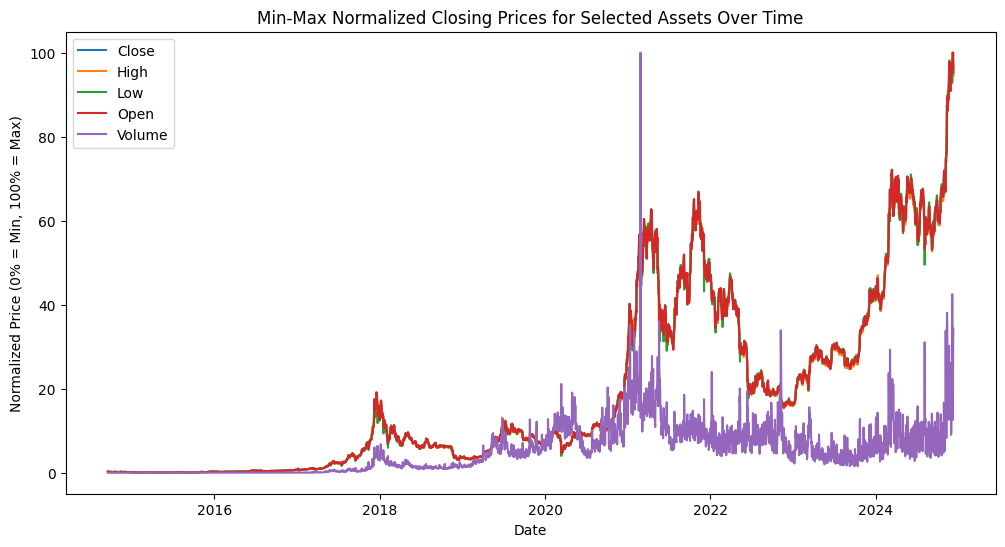

                          Date           Open           High           Low  \
0    2014-09-17 00:00:00+00:00     465.864014     468.174011    452.421997   
1    2014-09-18 00:00:00+00:00     456.859985     456.859985    413.104004   
2    2014-09-19 00:00:00+00:00     424.102997     427.834991    384.532013   
3    2014-09-20 00:00:00+00:00     394.673004     423.295990    389.882996   
4    2014-09-21 00:00:00+00:00     408.084991     412.425995    393.181000   
...                        ...            ...            ...           ...   
3733 2024-12-06 00:00:00+00:00   97074.226562  102039.882812  96514.875000   
3734 2024-12-07 00:00:00+00:00   99916.710938  100563.382812  99030.882812   
3735 2024-12-08 00:00:00+00:00   99921.914062  101399.992188  98771.515625   
3736 2024-12-09 00:00:00+00:00  101237.062500  101272.507812  94355.914062   
3737 2024-12-10 00:00:00+00:00   97391.328125   98220.039062  94435.835938   

              Close        Volume  
0        457.334015      21

In [3]:
if 'Datetime' in btc.columns:
    btc.rename(columns={'Datetime': 'Date'}, inplace=True)
    btc = btc.drop(columns="Volume")

print(btc)

# Perform min-max normalization for each asset
normalized_prices = btc.copy() #closed_prices, crypto_df, non_crypto_df, btc, compiled

# Exclude the 'Date' column during normalization
for col in normalized_prices.columns[1:]:
    min_price = normalized_prices[col].min()
    max_price = normalized_prices[col].max()
    normalized_prices[col] = ((normalized_prices[col] - min_price) / (max_price - min_price)) * 100

# Melt the DataFrame to long format
normalized_prices_melted = normalized_prices.melt(id_vars='Date', var_name='Asset', value_name='Normalized Price')

import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each asset's normalized prices
for asset, data in normalized_prices_melted.groupby('Asset'):
    ax.plot(data['Date'], data['Normalized Price'], label=asset)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Price (0% = Min, 100% = Max)')
ax.set_title('Min-Max Normalized Closing Prices for Selected Assets Over Time')
ax.legend()

# Show the plot
plt.show()

print(btc)

In [4]:
import pandas as pd
import os

def clean_sentiment_score(score):
    """Remove leading single quote from sentiment score if present"""
    if isinstance(score, str) and score.startswith("'"):
        return float(score.lstrip("'"))
    return float(score)

# Read the sentiment file
file_path = os.path.join(os.path.expanduser('~'), 'Downloads', 'combined_crypto_analysis.csv')
sentiment_df = pd.read_csv(file_path)

# Process and merge the data
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date']).dt.tz_localize('UTC')
sentiment_df['sentiment_score'] = sentiment_df['avg_sentiment'].apply(clean_sentiment_score)
btc['Date'] = pd.to_datetime(btc['Date'])

# Merge and update btc DataFrame
btc = btc.merge(sentiment_df[['Date', 'sentiment_score']], on='Date', how='left')

print(f"Merged shape: {btc.shape}, Rows with sentiment: {btc['sentiment_score'].notna().sum()}")

Merged shape: (3738, 7), Rows with sentiment: 3729


btc
              Open          High           Low     Close       Volume  \
0       456.859985    456.859985    413.104004 -7.192558     34483200   
1       424.102997    427.834991    384.532013 -6.984265     37919700   
2       394.673004    423.295990    389.882996  3.573492     36863600   
3       408.084991    412.425995    393.181000 -2.465854     26580100   
4       399.100006    406.915985    397.130005  0.835210     24127600   
...            ...           ...           ...       ...          ...   
3723  91978.140625  97361.179688  91778.664062  4.323745  71133452438   
3724  95954.945312  96650.203125  94677.351562 -0.323108  52260008261   
3725  95653.953125  98693.171875  95407.882812  1.891279  54968682476   
3726  97468.812500  97499.343750  96144.218750 -1.038839  31634227866   
3727  96461.335938  97888.125000  95770.187500  0.861319  36590695296   

      sentiment_score    Close_True  
0           -2.274216    424.440002  
1           -1.657459    394.795990  
2    

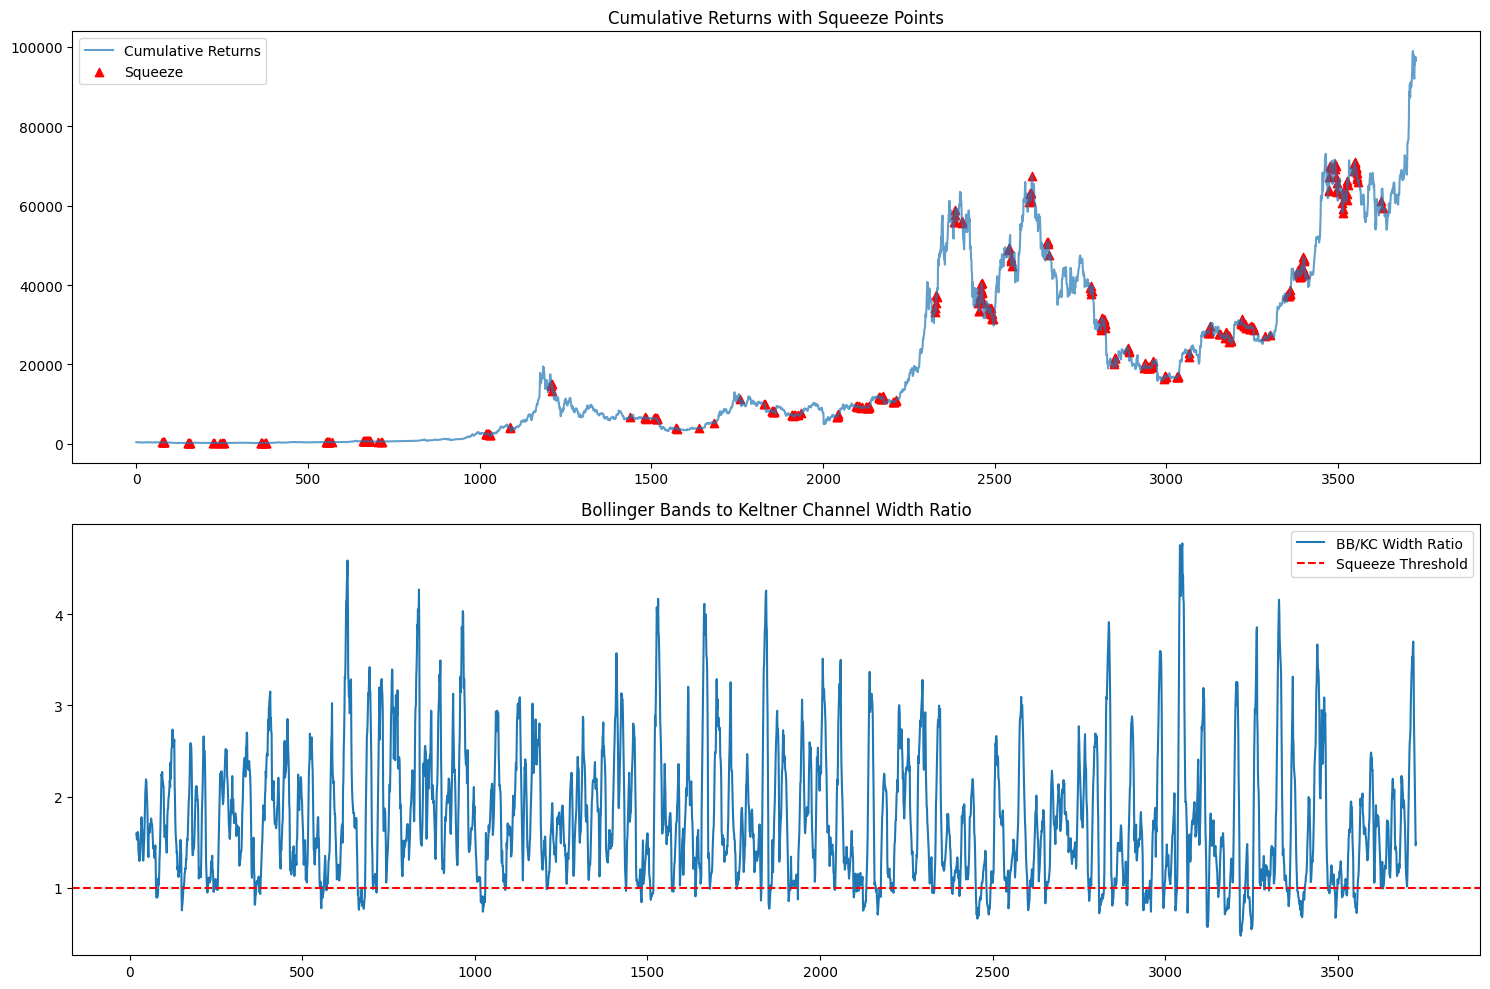

count     3709.000000
mean      4297.664753
std       5582.674845
min         10.679233
25%        319.551435
50%       2065.746485
75%       6488.964456
max      39268.288731
Name: BB_width, dtype: float64
count     3709.000000
mean      2609.823380
std       3135.504471
min          9.846689
25%        187.898466
50%       1155.763658
75%       4109.488691
max      16079.761631
Name: KC_width, dtype: float64
count    3709.000000
mean        1.754004
std         0.721469
min         0.473087
25%         1.187568
50%         1.606496
75%         2.174062
max         4.776663
Name: BB_KC_ratio, dtype: float64
First few values of cumulative_returns:
3723    95962.531250
3724    95652.468750
3725    97461.523438
3726    96449.054688
3727    97279.789062
Name: Close_True, dtype: float64
First few values of cumulative_high:
3723    97361.179688
3724    96650.203125
3725    98693.171875
3726    97499.343750
3727    97888.125000
Name: High, dtype: float64
First few values of cumulative_low:
3

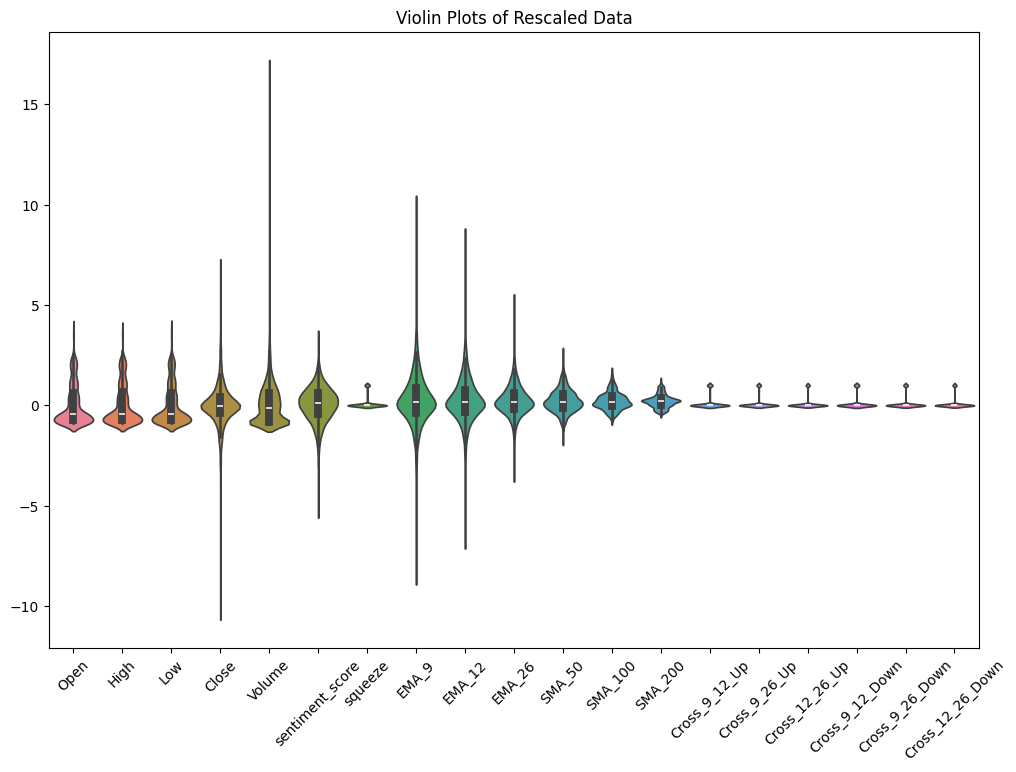

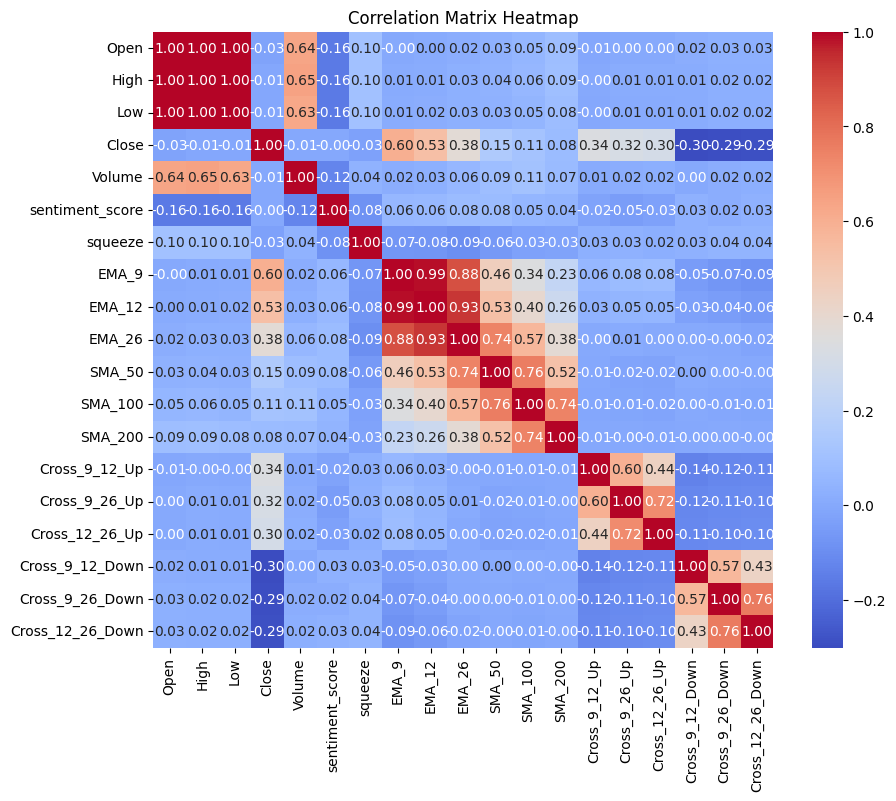

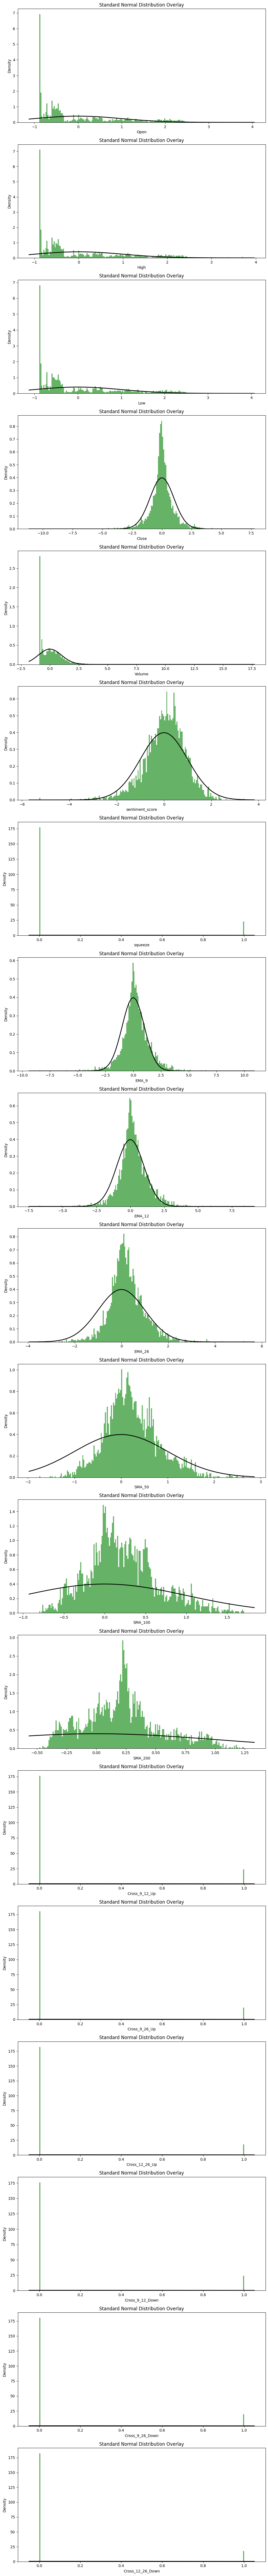

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Converts Close to Percentage ################################################################################
btc["Close_True"] = btc['Close']
btc['Close'] = btc['Close'].pct_change() * 100
btc = btc.dropna().reset_index(drop=True)

def global_rescale(data):
    mean_val = np.mean(data)
    std_val = np.std(data)
    if std_val == 0:
        rescaled_data = np.zeros_like(data)
    else:
        rescaled_data = (data - mean_val) / std_val
    return rescaled_data

if 'Date' in btc.columns:
    btc = btc.drop(columns='Date')
# Apply the global_rescale function to each column
rescaled_data = btc.apply(global_rescale) 

print("btc")
print(btc)
print("rescaled_data")
print(rescaled_data)

# Calculate EMA for ATR
def calculate_ema(series, length):
    return series.ewm(span=length, adjust=False).mean()

# Parameters
bb_length = 20
bb_std_dev = 2
kc_length = 20
kc_multiplier = 1.5

# Convert percentage changes back to price-like series for calculations
cumulative_returns = btc['Close_True']
cumulative_high = btc['High']
cumulative_low = btc['Low']

# Calculate Bollinger Bands on the cumulative series
sma = cumulative_returns.rolling(window=bb_length).mean()
std = cumulative_returns.rolling(window=bb_length).std()
bb_upper = sma + (bb_std_dev * std)
bb_lower = sma - (bb_std_dev * std)

# Calculate True Range using cumulative values
tr1 = cumulative_high - cumulative_low
tr2 = abs(cumulative_high - cumulative_returns.shift(1))
tr3 = abs(cumulative_low - cumulative_returns.shift(1))
true_range = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)

# Calculate ATR using EMA
atr = calculate_ema(true_range, kc_length)

# Calculate Keltner Channels
kc_upper = sma + (kc_multiplier * atr)
kc_lower = sma - (kc_multiplier * atr)

# Calculate TTM Squeeze
squeeze = np.where(
    (bb_upper < kc_upper) & (bb_lower > kc_lower),
    1,  # Squeeze is on
    0   # Squeeze is off
)

# Calculate Momentum
highest_high = cumulative_high.rolling(window=bb_length).max()
lowest_low = cumulative_low.rolling(window=bb_length).min()
avg_hl = (highest_high + lowest_low) / 2
avg_hlc = (avg_hl + cumulative_returns) / 2
momentum = cumulative_returns - avg_hlc

# Store calculations
btc['squeeze'] = squeeze
rescaled_data['squeeze'] = squeeze
btc['momentum'] = momentum
btc['BB_upper'] = bb_upper
btc['BB_lower'] = bb_lower
btc['KC_upper'] = kc_upper
btc['KC_lower'] = kc_lower
btc['BB_width'] = bb_upper - bb_lower
btc['KC_width'] = kc_upper - kc_lower
btc['BB_KC_ratio'] = (bb_upper - bb_lower) / (kc_upper - kc_lower)

# Print statistics
print("\nBand Width Statistics:")
print("\nBollinger Band Width:")
print(btc['BB_width'].describe())
print("\nKeltner Channel Width:")
print(btc['KC_width'].describe())
print("\nSqueeze Statistics:")
print(f"Total periods: {len(btc)}")
print(f"Number of squeeze periods: {btc['squeeze'].sum()}")
print(f"Percentage of time in squeeze: {(btc['squeeze'].sum() / len(btc) * 100):.2f}%")

# Visualization
plt.figure(figsize=(15, 10))

# Plot 1: Price with squeeze points
plt.subplot(2, 1, 1)
plt.plot(btc.index, cumulative_returns, label='Cumulative Returns', alpha=0.7)
squeeze_points = btc[btc['squeeze'] == 1].index
plt.scatter(squeeze_points, 
           cumulative_returns[squeeze_points],
           color='red', marker='^', label='Squeeze')
plt.title('Cumulative Returns with Squeeze Points')
plt.legend()

# Plot 2: BB/KC Width Ratio
plt.subplot(2, 1, 2)
plt.plot(btc.index, btc['BB_KC_ratio'], label='BB/KC Width Ratio')
plt.axhline(y=1, color='r', linestyle='--', label='Squeeze Threshold')
plt.title('Bollinger Bands to Keltner Channel Width Ratio')
plt.legend()

plt.tight_layout()
plt.show()

print(btc['BB_width'].describe())
print(btc['KC_width'].describe())
print(btc['BB_KC_ratio'].describe())

# Print initial values to check scales and consistency
print("First few values of cumulative_returns:")
print(cumulative_returns.tail())

print("First few values of cumulative_high:")
print(cumulative_high.tail())

print("First few values of cumulative_low:")
print(cumulative_low.tail())

# After calculating True Range and ATR
print("\nFirst few values of True Range (TR):")
print(tr1.tail(), tr2.tail(), tr3.tail())

print("\nFirst few values of Average True Range (ATR):")
print(atr.tail())

# After calculating Bollinger Bands
print("\nFirst few values of SMA for Bollinger Bands:")
print(sma.tail())

print("\nFirst few values of Bollinger Bands Upper and Lower:")
print("BB Upper:", bb_upper.tail())
print("BB Lower:", bb_lower.tail())

# After calculating Keltner Channels
print("\nFirst few values of Keltner Channels Upper and Lower:")
print("KC Upper:", kc_upper.tail())
print("KC Lower:", kc_lower.tail())

# After calculating Widths
print("\nBollinger Band Width:")
print(btc['BB_width'].tail())

print("\nKeltner Channel Width:")
print(btc['KC_width'].tail())

# Print ratios and squeeze information
print("\nFirst few values of BB/KC Width Ratio:")
print(btc['BB_KC_ratio'].tail())

print("\nSqueeze Statistics:")
print("First few periods of squeeze signal:")
print(btc['squeeze'].tail())

rescaled_data.drop(columns=['Close_True'], inplace=True)

# Calculate EMAs and SMAs on the raw price data
# (keeping original price-based MAs for cross detection)
price_emas = {
    'EMA_9': btc['Close'].ewm(span=9, adjust=False).mean(),
    'EMA_12': btc['Close'].ewm(span=12, adjust=False).mean(),
    'EMA_26': btc['Close'].ewm(span=26, adjust=False).mean(),
    'SMA_50': btc['Close'].rolling(window=50).mean(),
    'SMA_100': btc['Close'].rolling(window=100).mean(),
    'SMA_200': btc['Close'].rolling(window=200).mean()
}

# Calculate percentage-based EMAs and SMAs
# (these will be your actual features)
rescaled_data['EMA_9'] = btc['Close'].ewm(span=9, adjust=False).mean()
rescaled_data['EMA_12'] = btc['Close'].ewm(span=12, adjust=False).mean()
rescaled_data['EMA_26'] = btc['Close'].ewm(span=26, adjust=False).mean()
rescaled_data['SMA_50'] = btc['Close'].rolling(window=50).mean()
rescaled_data['SMA_100'] = btc['Close'].rolling(window=100).mean()
rescaled_data['SMA_200'] = btc['Close'].rolling(window=200).mean()

# Detect upward crossovers
rescaled_data['Cross_9_12_Up'] = ((rescaled_data['EMA_9'] > rescaled_data['EMA_12']) & (rescaled_data['EMA_9'].shift(1) <= rescaled_data['EMA_12'].shift(1))).astype(int)
rescaled_data['Cross_9_26_Up'] = ((rescaled_data['EMA_9'] > rescaled_data['EMA_26']) & (rescaled_data['EMA_9'].shift(1) <= rescaled_data['EMA_26'].shift(1))).astype(int)
rescaled_data['Cross_12_26_Up'] = ((rescaled_data['EMA_12'] > rescaled_data['EMA_26']) & (rescaled_data['EMA_12'].shift(1) <= rescaled_data['EMA_26'].shift(1))).astype(int)

# Detect downward crossovers
rescaled_data['Cross_9_12_Down'] = ((rescaled_data['EMA_9'] < rescaled_data['EMA_12']) & (rescaled_data['EMA_9'].shift(1) >= rescaled_data['EMA_12'].shift(1))).astype(int)
rescaled_data['Cross_9_26_Down'] = ((rescaled_data['EMA_9'] < rescaled_data['EMA_26']) & (rescaled_data['EMA_9'].shift(1) >= rescaled_data['EMA_26'].shift(1))).astype(int)
rescaled_data['Cross_12_26_Down'] = ((rescaled_data['EMA_12'] < rescaled_data['EMA_26']) & (rescaled_data['EMA_12'].shift(1) >= rescaled_data['EMA_26'].shift(1))).astype(int)

# Drop all NaN values and reset index
rescaled_data.dropna(inplace=True)
rescaled_data.reset_index(drop=True, inplace=True)

print("Rescaled Data:")
print(rescaled_data)

#rescaled_data = rescaled_data.drop(columns=['Date'])

# Compute basic statistics for each column
stats = rescaled_data.describe()

# Print the statistics
print("\nBasic Statistical Summary:")
print(stats)

# Plot violin plots for each column
plt.figure(figsize=(12, 8))
sns.violinplot(data=rescaled_data)
plt.title('Violin Plots of Rescaled Data')
plt.xticks(rotation=45)
plt.show()

# Compute the correlation matrix
corr_matrix = rescaled_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Plot histograms with a standard normal distribution overlay for each column
fig, axes = plt.subplots(nrows=len(rescaled_data.columns), ncols=1, figsize=(10, 5 * len(rescaled_data.columns)))
if len(rescaled_data.columns) == 1:
    axes = [axes]  # Ensure axes is iterable for a single-column dataframe

for ax, column in zip(axes, rescaled_data.columns):
    data = rescaled_data[column].dropna()  # Drop NA values

    # Define the number of bins to make them smaller
    #bins = int(np.sqrt(len(data)))  # You can adjust this for even smaller bins if needed
    bins = 200

    # Plot histogram
    ax.hist(data, bins=bins, density=True, alpha=0.6, color='g')
    
    # Define the range of x values for the normal distribution line
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    
    # Calculate the standard normal distribution
    p = norm.pdf(x, 0, 1)  # Mean = 0, Std = 1
    ax.plot(x, p, 'k', linewidth=2)
    
    ax.set_title(f"Standard Normal Distribution Overlay")
    ax.set_xlabel(column)
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
import pandas as pd
from skorch import NeuralNetClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from skorch.callbacks import EarlyStopping, LRScheduler
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, roc_curve, auc
from tqdm import tqdm
import time
from skorch.callbacks import Callback
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

class ProgressCallback(Callback):
    def __init__(self, total_epochs, desc="Training"):
        self.pbar = None
        self.total_epochs = total_epochs
        self.desc = desc
        
    def on_train_begin(self, net, X=None, y=None, **kwargs):
        self.pbar = tqdm(total=self.total_epochs, desc=self.desc, miniters=10)
        
    def on_epoch_end(self, net, **kwargs):
        self.pbar.update(1)
        
    def on_train_end(self, net, X=None, y=None, **kwargs):
        if self.pbar is not None:
            self.pbar.close()
            self.pbar = None
            
    def initialize(self):
        pass
        
    def set_params(self, **params):
        for key, val in params.items():
            setattr(self, key, val)
        return self

# Data Splitting Configuration
test_size = 0.2
val_size = 0.2
eval_size = 0.1

def create_sequences(data, target, seq_length):
    """Create sequences for LSTM processing"""
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:(i + seq_length)].to_numpy())
        y.append(target.iloc[i + seq_length])
    return np.array(X), np.array(y)

def prepare_data(data, target, seq_length):
    """Prepare data with specific sequence length"""
    X_seq, y_seq = create_sequences(data, target, seq_length)
    return torch.tensor(X_seq, dtype=torch.float32), torch.tensor(y_seq, dtype=torch.long)

def prepare_train_test_splits(data, target_col):
    """Prepare train, validation, eval, and test splits while maintaining temporal order"""
    # Convert target to binary (1 if positive return, 0 if negative or zero)
    binary_target = (data[target_col] > 0).astype(int)
    data = data.drop(columns=[target_col])
    
    total_size = len(data)
    test_split_idx = int(total_size * (1 - test_size))
    val_split_idx = int(test_split_idx * (1 - val_size - eval_size))
    eval_split_idx = int(test_split_idx * (1 - eval_size))
    
    splits = {
        'train': {
            'X': data.iloc[:val_split_idx, :],
            'y': binary_target[:val_split_idx]
        },
        'eval': {
            'X': data.iloc[val_split_idx:eval_split_idx, :],
            'y': binary_target[val_split_idx:eval_split_idx]
        },
        'val': {
            'X': data.iloc[eval_split_idx:test_split_idx, :],
            'y': binary_target[eval_split_idx:test_split_idx]
        },
        'test': {
            'X': data.iloc[test_split_idx:, :],
            'y': binary_target[test_split_idx:]
        }
    }
    return splits

# Initial data preparation
splits = prepare_train_test_splits(rescaled_data, 'Close')
X_train, y_train = splits['train']['X'], splits['train']['y']
X_eval, y_eval = splits['eval']['X'], splits['eval']['y']
X_val, y_val = splits['val']['X'], splits['val']['y']
X_test, y_test = splits['test']['X'], splits['test']['y']

class ImprovedLSTMModule(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=2, nonlin=nn.ReLU(), 
                 dropout_rate=0.1, use_residual=True):
        super().__init__()
        
        self.lstm = nn.LSTM(
            input_size=input_size, 
            hidden_size=hidden_size, 
            num_layers=num_layers, 
            batch_first=True,
            bidirectional=True,
            dropout=dropout_rate if num_layers > 1 else 0
        )
        
        lstm_output_dim = hidden_size * 2
        self.layer_norm = nn.LayerNorm(lstm_output_dim)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc1 = nn.Linear(lstm_output_dim, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 2)  # Changed to 2 for binary classification
        self.use_residual = use_residual
        self.nonlin = nonlin
        
    def forward(self, X):
        lstm_out, _ = self.lstm(X)
        out = lstm_out[:, -1, :]
        
        out = self.layer_norm(out)
        identity = self.fc1(out)
        out = self.fc1(out)
        out = self.nonlin(out)
        out = self.dropout(out)
        
        if self.use_residual:
            out = out + identity
            
        out = self.fc2(out)
        return out

def evaluate_classification_model(model, X_test_seq, y_test_seq, history=None):
    """Enhanced model evaluation for binary classification"""
    # Get predictions
    y_pred_proba = model.predict_proba(X_test_seq)
    y_pred = model.predict(X_test_seq)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_seq, y_pred)
    precision = precision_score(y_test_seq, y_pred)
    recall = recall_score(y_test_seq, y_pred)
    f1 = f1_score(y_test_seq, y_pred)
    roc_auc = roc_auc_score(y_test_seq, y_pred_proba[:, 1])
    
    # Create plots
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test_seq, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[0,0])
    axes[0,0].set_title('Confusion Matrix')
    axes[0,0].set_xlabel('Predicted')
    axes[0,0].set_ylabel('True')
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test_seq, y_pred_proba[:, 1])
    axes[0,1].plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    axes[0,1].plot([0, 1], [0, 1], 'k--')
    axes[0,1].set_xlabel('False Positive Rate')
    axes[0,1].set_ylabel('True Positive Rate')
    axes[0,1].set_title('ROC Curve')
    axes[0,1].legend()
    
    # Learning curves if history is provided
    if history:
        train_loss = [h['train_loss'] for h in history]
        valid_loss = [h['valid_loss'] for h in history if 'valid_loss' in h]
        
        axes[1,0].plot(train_loss, label='Training Loss', marker='o')
        axes[1,0].plot(valid_loss, label='Validation Loss', marker='o')
        axes[1,0].set_title('Loss over Epochs')
        axes[1,0].set_xlabel('Epochs')
        axes[1,0].set_ylabel('Loss')
        axes[1,0].legend()
        axes[1,0].grid(True)
    
    # Class distribution
    axes[1,1].bar(['Class 0', 'Class 1'], 
                 [sum(y_test_seq == 0), sum(y_test_seq == 1)],
                 alpha=0.5)
    axes[1,1].set_title('Class Distribution in Test Set')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }

def create_neural_net(params, input_size, additional_callbacks=None):
    """Create neural network for binary classification"""
    callbacks = [
        ('lr_scheduler', LRScheduler(
            policy=ReduceLROnPlateau, 
            monitor='valid_loss',
            mode='min',
            patience=70,
            factor=0.5,
            verbose=False
        )),
        ('early_stopping', EarlyStopping(
            monitor='valid_loss',
            patience=200,
            threshold=0.0001,
            threshold_mode='rel',
            lower_is_better=True
        ))
    ]
    
    if additional_callbacks:
        callbacks.extend(additional_callbacks)
    
    return NeuralNetClassifier(
        ImprovedLSTMModule,
        module__input_size=input_size,
        module__hidden_size=int(params['hidden_size']),
        module__num_layers=int(params['num_layers']),
        module__dropout_rate=params['dropout_rate'],
        module__nonlin=params['nonlin'],
        module__use_residual=params['use_residual'],
        max_epochs=int(params['max_epochs']),
        lr=params['lr'],
        batch_size=int(params['batch_size']),
        optimizer=torch.optim.Adam,
        optimizer__weight_decay=params['weight_decay'],
        criterion=nn.CrossEntropyLoss,
        callbacks=callbacks,
        verbose=0
    )

# Hyperparameter space
space = {
    'seq_length': hp.choice('seq_length', [5, 10, 15, 20, 30, 50]),
    'hidden_size': hp.choice('hidden_size', [256, 512]),
    'num_layers': hp.choice('num_layers', [3, 4, 5]),
    'dropout_rate': hp.uniform('dropout_rate', 0.05, 0.3),
    'nonlin': hp.choice('nonlin', [nn.ReLU(), nn.LeakyReLU(negative_slope=0.1), nn.GELU()]),
    'max_epochs': hp.choice('max_epochs', [500]),
    'lr': hp.loguniform('lr', np.log(0.001), np.log(0.1)),
    'batch_size': hp.choice('batch_size', [256]),
    'weight_decay': hp.uniform('weight_decay', 0.01, 0.05),
    'use_residual': hp.choice('use_residual', [True])
} 

def objective(params):
    """Objective function for hyperparameter optimization without cross validation"""
    start_time = time.time()
    print(f"\nStarting new trial with parameters:")
    for key, value in params.items():
        print(f"{key}: {value}")
    
    seq_length = int(params['seq_length'])
    
    # Prepare sequences
    X_train_seq, y_train_seq = prepare_data(X_train, y_train, seq_length)
    X_val_seq, y_val_seq = prepare_data(X_val, y_val, seq_length)
    
    # Create and train model
    print("\nTraining model...")
    progress_cb = ProgressCallback(params['max_epochs'], "Training")
    
    net = create_neural_net(
        params, 
        X_train_seq.shape[2],
        additional_callbacks=[('progress', progress_cb)]
    )
    
    # Train on training data
    net.fit(X_train_seq, y_train_seq)
    
    # Evaluate on validation set
    val_pred_proba = net.predict_proba(X_val_seq)
    val_score = -roc_auc_score(y_val_seq, val_pred_proba[:, 1])  # Negative because we minimize
    
    total_time = time.time() - start_time
    print(f"\nTrial completed in {total_time:.2f} seconds")
    print(f"Validation ROC-AUC: {-val_score:.4f}")
    
    return {
        'loss': val_score,
        'status': STATUS_OK,
        'model': net,
        'val_score': -val_score,  # Convert back to positive for reporting
        'time': total_time,
        'params': params
    }

# Run optimization
print(f"\nStarting optimization with {3} trials")
trials = Trials()
start_time = time.time()

best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=5,  # Number of trials to run
    trials=trials,
    show_progressbar=True
)

total_time = time.time() - start_time

# Get best trial
best_trial_idx = np.argmin([t['result']['loss'] for t in trials.trials])
best_trial = trials.trials[best_trial_idx]
best_model = best_trial['result']['model']
best_params = best_trial['result']['params']

# Print results
print("\n" + "="*50)
print("Hyperopt Optimization Results:")
print("="*50)
print(f"Best validation ROC-AUC: {best_trial['result']['val_score']:.4f}")
print(f"Total optimization time: {sum(t['result']['time'] for t in trials.trials):.2f} seconds")

print("\nBest parameters:")
for param, value in best_params.items():
    if isinstance(value, (nn.Module)):
        print(f"{param}: {value.__class__.__name__}")
    else:
        print(f"{param}: {value}")

# Evaluate on test set
print("\nEvaluating on test set...")
seq_length = int(best_params['seq_length'])
X_test_seq, y_test_seq = prepare_data(X_test, y_test, seq_length)


Starting optimization with 3 trials
                                                     
Starting new trial with parameters:
batch_size: 256                                      
dropout_rate: 0.12092009336716524                    
hidden_size: 256                                     
lr: 0.25208254386293844                              
max_epochs: 500                                      
nonlin: GELU(approximate='none')                     
num_layers: 4                                        
seq_length: 10                                       
use_residual: True                                   
weight_decay: 0.020381421356675263                   
                                                     
Training model...
  0%|          | 0/5 [00:00<?, ?trial/s, best loss=?]

c:\Users\kghor\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(

Training:  44%|####4     | 222/500 [17:33<21:59,  4.74s/it]


                                                     
Trial completed in 1056.15 seconds
Validation ROC-AUC: 0.5000                           
                                                                     
Starting new trial with parameters:
batch_size: 256                                                      
dropout_rate: 0.1122515154218461                                     
hidden_size: 256                                                     
lr: 0.06416803965695964                                              
max_epochs: 500                                                      
nonlin: GELU(approximate='none')                                     
num_layers: 4                                                        
seq_length: 10                                                       
use_residual: True                                                   
weight_decay: 0.020772147898593208                                   
                                                   

c:\Users\kghor\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(

Training:  44%|####4     | 222/500 [19:02<23:50,  5.15s/it]


                                                                     
Trial completed in 1143.33 seconds
Validation ROC-AUC: 0.5000                                           
                                                                     
Starting new trial with parameters:
batch_size: 256                                                    
dropout_rate: 0.0834652230812973                                   
hidden_size: 256                                                   
lr: 0.09712132587159408                                            
max_epochs: 500                                                    
nonlin: GELU(approximate='none')                                   
num_layers: 4                                                      
seq_length: 10                                                     
use_residual: True                                                 
weight_decay: 0.021789847430825203                                 
                                       

c:\Users\kghor\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(

Training:  44%|####3     | 219/500 [18:37<23:54,  5.10s/it]


                                                                   
Trial completed in 1118.72 seconds
Validation ROC-AUC: 0.5000                                         
                                                                   
Starting new trial with parameters:
batch_size: 256                                                    
dropout_rate: 0.1185673066504641                                   
hidden_size: 256                                                   
lr: 0.3807562459236908                                             
max_epochs: 500                                                    
nonlin: GELU(approximate='none')                                   
num_layers: 4                                                      
seq_length: 10                                                     
use_residual: True                                                 
weight_decay: 0.02343289954679261                                  
                                             

c:\Users\kghor\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(

Training:  47%|####6     | 235/500 [23:04<26:00,  5.89s/it]


                                                                   
Trial completed in 1384.95 seconds
Validation ROC-AUC: 0.4768                                           
                                                                     
Starting new trial with parameters:
batch_size: 256                                                      
dropout_rate: 0.2110157090144562                                     
hidden_size: 256                                                     
lr: 0.48356642697809926                                              
max_epochs: 500                                                      
nonlin: GELU(approximate='none')                                     
num_layers: 4                                                        
seq_length: 10                                                       
use_residual: True                                                   
weight_decay: 0.021517163309208023                                   
                     

c:\Users\kghor\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(

Training:  46%|####5     | 228/500 [23:41<28:15,  6.23s/it]


                                                                     
Trial completed in 1422.10 seconds
Validation ROC-AUC: 0.5000                                           
100%|██████████| 5/5 [1:42:05<00:00, 1225.06s/trial, best loss: -0.5]

Hyperopt Optimization Results:
Best validation ROC-AUC: 0.5000
Total optimization time: 6125.24 seconds

Best parameters:
batch_size: 256
dropout_rate: 0.12092009336716524
hidden_size: 256
lr: 0.25208254386293844
max_epochs: 500
nonlin: GELU
num_layers: 4
seq_length: 10
use_residual: True
weight_decay: 0.020381421356675263

Evaluating on test set...


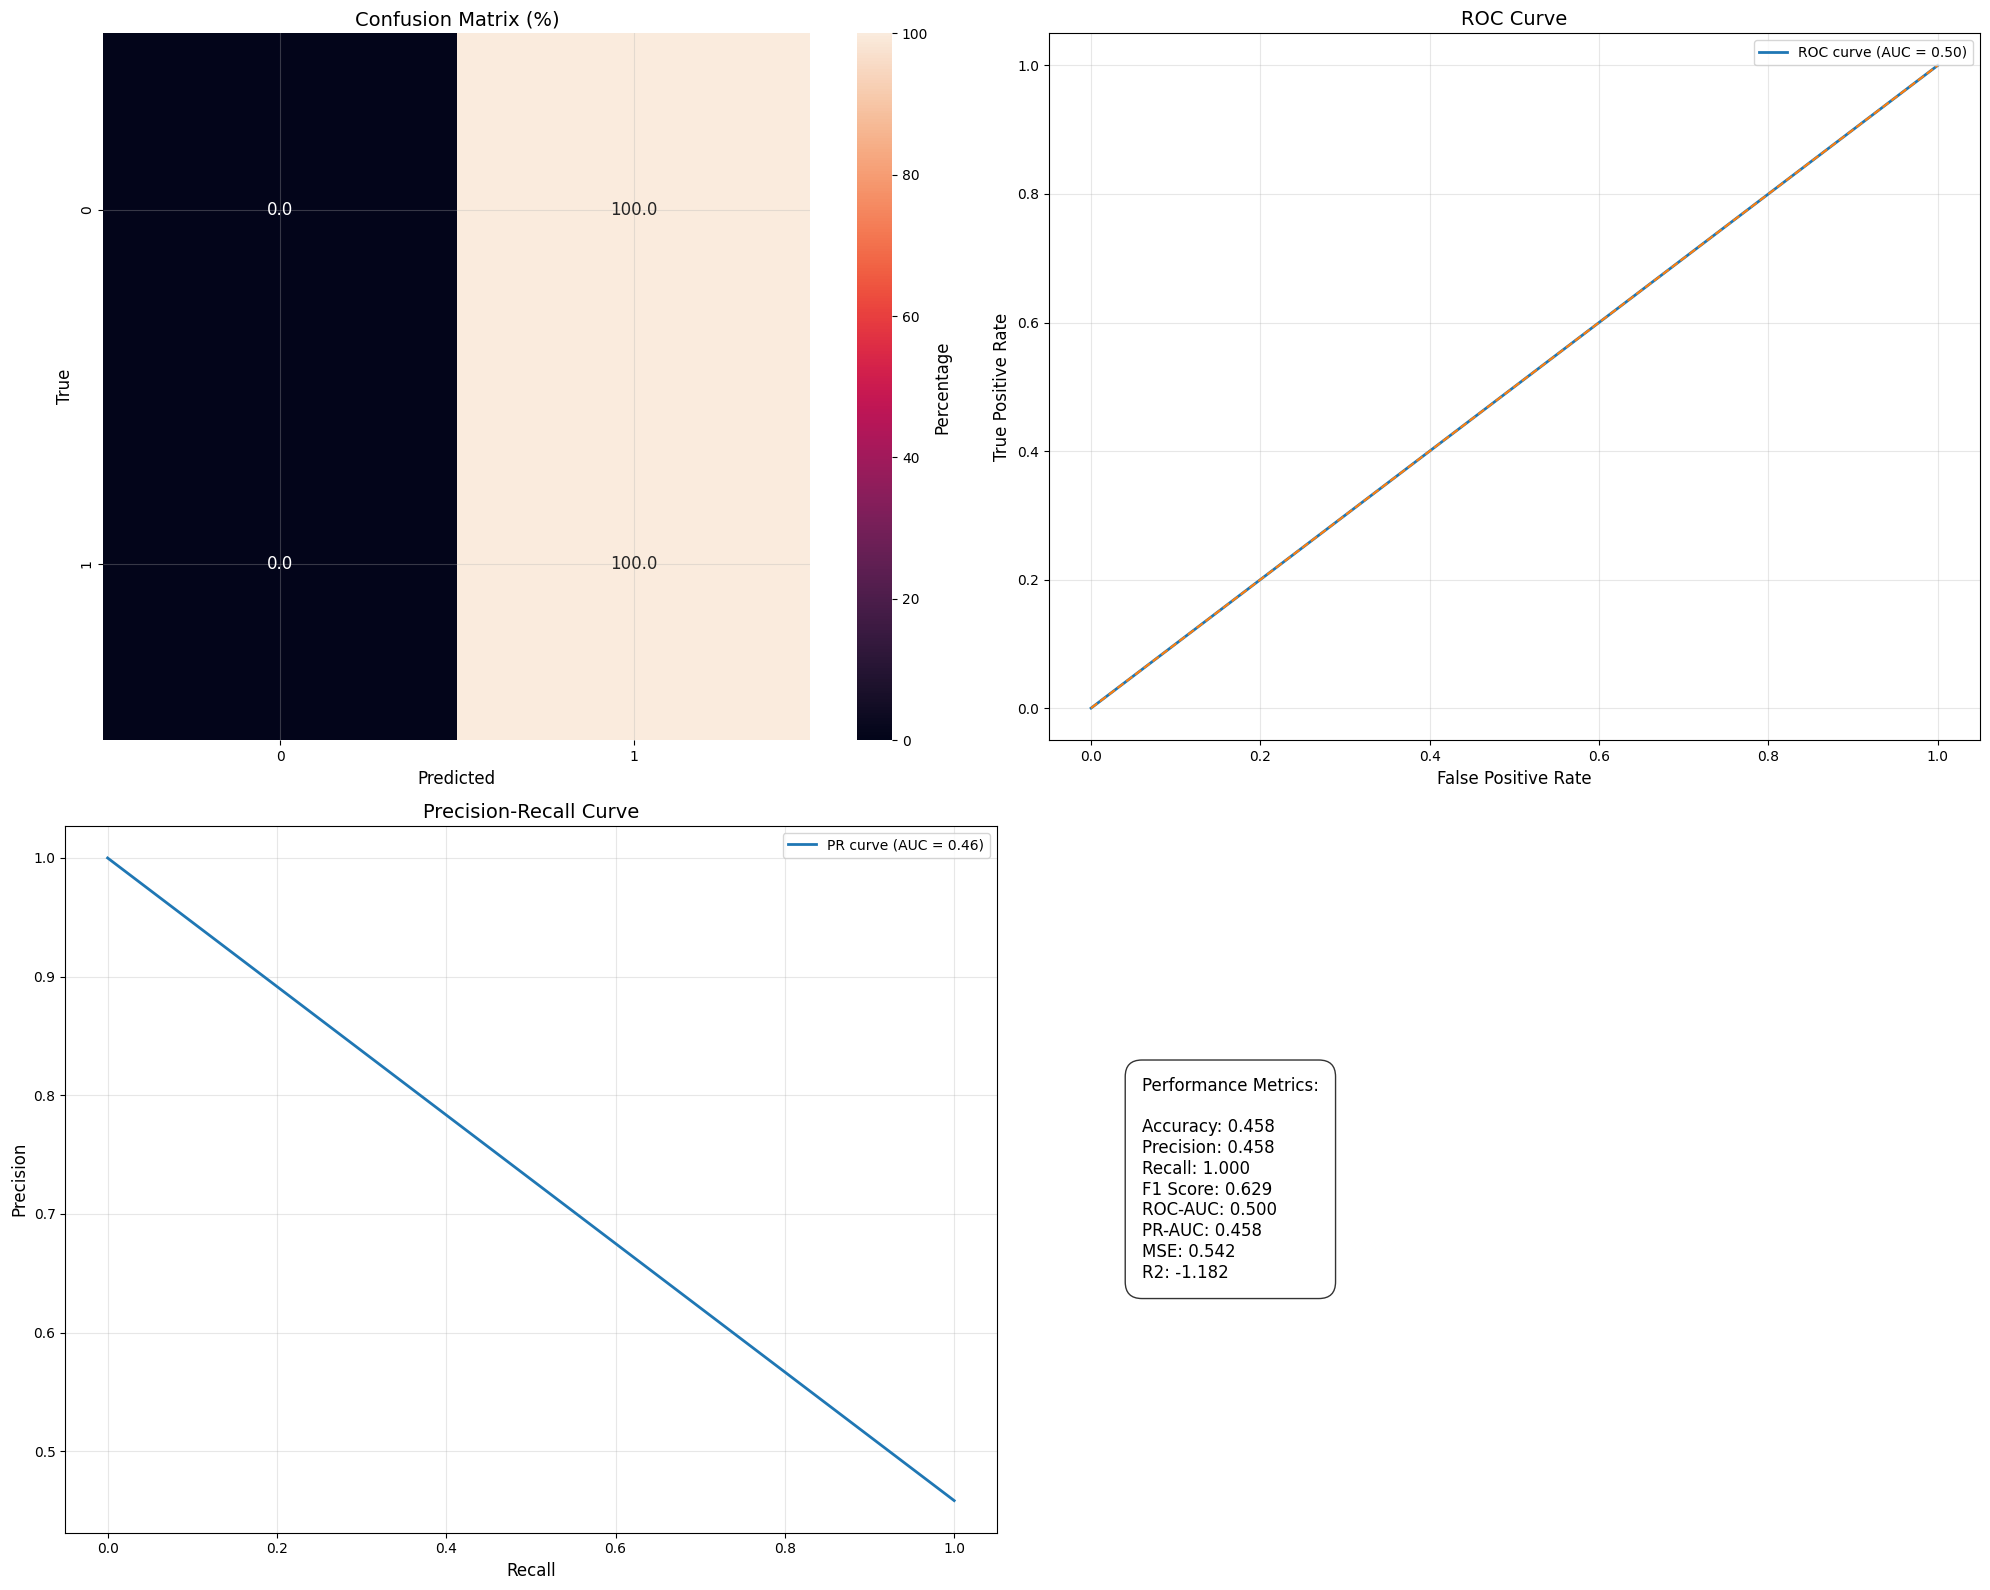

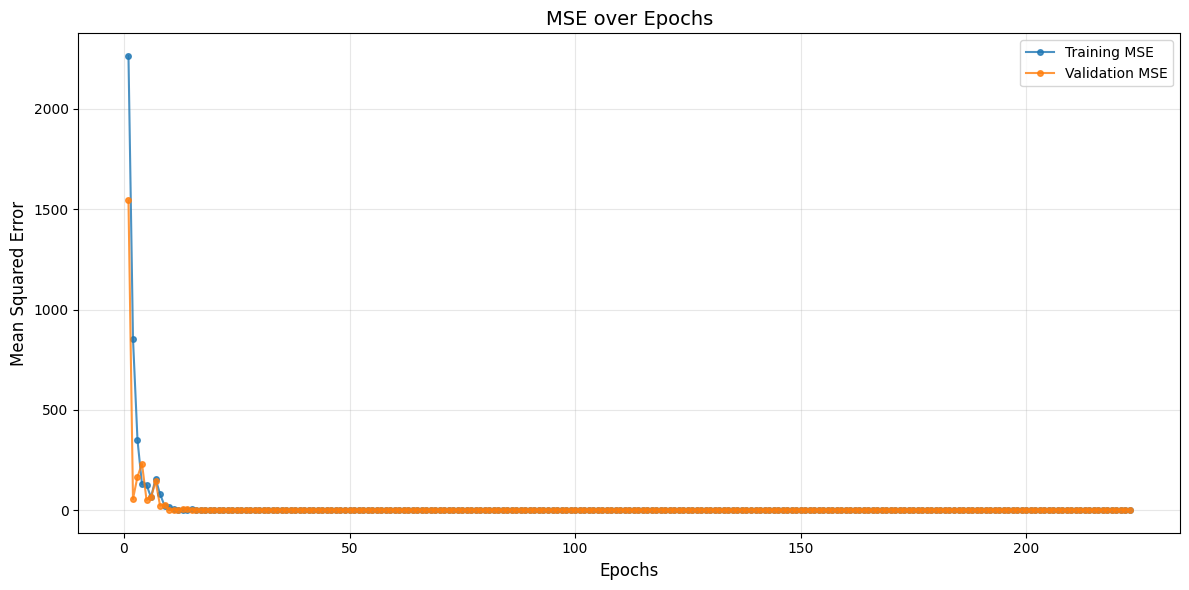


Best Hyperparameters:
                  lr: 0.25208254386293844
          max_epochs: 500
          batch_size: 256
predict_nonlinearity: auto
          warm_start: False
             verbose: 0
              device: cpu
             compile: False
         use_caching: auto
 _params_to_validate: {'optimizer__weight_decay', 'module__num_layers', 'module__input_size', 'module__use_residual', 'module__dropout_rate', 'module__hidden_size', 'module__nonlin'}
  module__input_size: 17
 module__hidden_size: 256
  module__num_layers: 4
module__dropout_rate: 0.12092009336716524
module__use_residual: True
optimizer__weight_decay: 0.020381421356675263
             classes: None
callbacks__epoch_timer: <skorch.callbacks.logging.EpochTimer object at 0x000001F5312638B0>
callbacks__train_loss: <skorch.callbacks.scoring.PassthroughScoring object at 0x000001F5305EE5E0>
callbacks__train_loss__name: train_loss
callbacks__train_loss__lower_is_better: True
callbacks__train_loss__on_train: True
callbacks__

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                           roc_auc_score, confusion_matrix, roc_curve, 
                           precision_recall_curve, average_precision_score,
                           mean_squared_error, r2_score)

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

def calculate_all_metrics(y_true, y_pred, y_pred_proba):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),
        'roc_auc': roc_auc_score(y_true, y_pred_proba[:, 1]),
        'confusion_matrix': confusion_matrix(y_true, y_pred),
        'pr_auc': average_precision_score(y_true, y_pred_proba[:, 1]),
        'mse': mean_squared_error(y_true, y_pred),
        'r2': r2_score(y_true, y_pred)
    }

def plot_confusion_matrix(metrics, ax):
    cm = metrics['confusion_matrix']
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    sns.heatmap(cm_percent, annot=True, fmt='.1f', 
                ax=ax,
                cbar_kws={'label': 'Percentage'},
                annot_kws={'size': 12},
                square=True)
    ax.set_title('Confusion Matrix (%)')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

def plot_roc_curve(metrics, y_true, y_pred_proba, ax):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba[:, 1])
    ax.plot(fpr, tpr, linewidth=2, label=f'ROC curve (AUC = {metrics["roc_auc"]:.2f})')
    ax.plot([0, 1], [0, 1], '--')
    ax.set_title('ROC Curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.grid(True)
    ax.legend()

def plot_mse_over_epochs(history):
    plt.figure(figsize=(12, 6))
    
    train_loss = [h['train_loss'] for h in history]
    valid_loss = [h['valid_loss'] for h in history if 'valid_loss' in h]
    epochs = range(1, len(train_loss) + 1)
    
    plt.plot(epochs, train_loss, marker='o', markersize=4, label='Training MSE', alpha=0.8)
    plt.plot(epochs, valid_loss, marker='o', markersize=4, label='Validation MSE', alpha=0.8)
    
    plt.title('MSE over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

def plot_precision_recall_curve(y_true, y_pred_proba, ax):
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba[:, 1])
    pr_auc = average_precision_score(y_true, y_pred_proba[:, 1])
    
    ax.plot(recall, precision, linewidth=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    ax.set_title('Precision-Recall Curve')
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.grid(True)
    ax.legend()

def create_model_visualizations(model, X_test_seq, y_test_seq, history=None, trials=None):
    y_pred_proba = model.predict_proba(X_test_seq)
    y_pred = model.predict(X_test_seq)
    
    metrics = calculate_all_metrics(y_test_seq, y_pred, y_pred_proba)
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    plot_confusion_matrix(metrics, axes[0,0])
    plot_roc_curve(metrics, y_test_seq, y_pred_proba, axes[0,1])
    plot_precision_recall_curve(y_test_seq, y_pred_proba, axes[1,0])
    
    axes[1,1].axis('off')
    metrics_text = (f'Performance Metrics:\n\n'
                   f'Accuracy: {metrics["accuracy"]:.3f}\n'
                   f'Precision: {metrics["precision"]:.3f}\n'
                   f'Recall: {metrics["recall"]:.3f}\n'
                   f'F1 Score: {metrics["f1"]:.3f}\n'
                   f'ROC-AUC: {metrics["roc_auc"]:.3f}\n'
                   f'PR-AUC: {metrics["pr_auc"]:.3f}\n'
                   f'MSE: {metrics["mse"]:.3f}\n'
                   f'R2: {metrics["r2"]:.3f}')
    axes[1,1].text(0.1, 0.5, metrics_text, fontsize=12, va='center',
                  bbox=dict(facecolor='white', alpha=0.8,
                           boxstyle='round,pad=1'))
    
    plt.tight_layout()
    plt.show()
    
    if history:
        plot_mse_over_epochs(history)
    
    print("\nBest Hyperparameters:")
    print("="*50)
    try:
        params = model.get_params()
        for name, param in params.items():
            if not callable(param) and not isinstance(param, (dict, list)):
                print(f"{name:>20}: {param}")
    except:
        print("Could not retrieve model parameters")
    
    return metrics

# Usage
results = create_model_visualizations(
    model=best_model,
    X_test_seq=X_test_seq,
    y_test_seq=y_test_seq,
    history=best_model.history,
    trials=trials  # Optional
)